# Jayden Uphill

## Research question/interests

My interest in this topic focuses on which countries are mitigating their carbon footprint. I want to know:

1. Which countries (if any) have reduced their annual C02 emissions within the last 15 years? (2004-2019)

2. Does the wealth of a country have a corrolation to higher C02 emissions? E.g. U.S.A. is more wealthy than China but may emit less C02, and more wealthy than Canada but may emit more C02.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(font_scale=0.9, palette = "rocket")


In [2]:
carbonData = pd.read_csv('../data/raw/CO2emissions.csv', skiprows =4)
carbonRaw = carbonData.drop(carbonData.columns[[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,64,65,66]], axis=1)

print(carbonRaw)

                    Country Name Country Code  \
0                          Aruba          ABW   
1    Africa Eastern and Southern          AFE   
2                    Afghanistan          AFG   
3     Africa Western and Central          AFW   
4                         Angola          AGO   
..                           ...          ...   
261                       Kosovo          XKX   
262                  Yemen, Rep.          YEM   
263                 South Africa          ZAF   
264                       Zambia          ZMB   
265                     Zimbabwe          ZWE   

                             Indicator Name      1990      1991      1992  \
0    CO2 emissions (metric tons per capita)       NaN       NaN       NaN   
1    CO2 emissions (metric tons per capita)  0.999038  0.953224  0.915661   
2    CO2 emissions (metric tons per capita)  0.191745  0.167682  0.095958   
3    CO2 emissions (metric tons per capita)  0.478144  0.530016  0.568305   
4    CO2 emissions (metric

In [3]:
GDP = pd.read_csv('../data/raw/gdp-per-capita-worldbank.csv')

print(GDP)

           Entity Code  Year  \
0     Afghanistan  AFG  2002   
1     Afghanistan  AFG  2003   
2     Afghanistan  AFG  2004   
3     Afghanistan  AFG  2005   
4     Afghanistan  AFG  2006   
...           ...  ...   ...   
6161     Zimbabwe  ZWE  2016   
6162     Zimbabwe  ZWE  2017   
6163     Zimbabwe  ZWE  2018   
6164     Zimbabwe  ZWE  2019   
6165     Zimbabwe  ZWE  2020   

      GDP per capita, PPP (constant 2017 international $)  
0                                           1189.784668    
1                                           1235.810059    
2                                           1200.277954    
3                                           1286.793701    
4                                           1315.789062    
...                                                 ...    
6161                                        3678.217041    
6162                                        3795.642334    
6163                                        3923.030518    
6164           

## Milestone 3

In [4]:
Pcarbon = carbonRaw.drop(carbonRaw.columns[[1,2
                                            #,3,4,5,6,7,8,9,10,11,12,13,14,15,16
                                           ]], axis=1)
#Shows the data for each country for the last 15 years (each country has an equal amount of recorded data)
Pcarbon.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,233.000000,234.000000,237.000000,237.000000,237.000000,238.000000,238.000000,238.000000,237.000000,237.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,4.257973,4.157749,4.055572,3.972054,3.930550,4.010427,4.079973,4.115842,4.137589,4.118380,...,4.333087,4.337205,4.375662,4.286836,4.198346,4.152282,4.155511,4.161985,4.138992,4.089567
std,5.309753,5.294381,5.102961,5.110671,5.168887,5.209040,5.341320,5.518487,5.506257,5.563380,...,5.016823,4.971602,4.953363,4.889850,4.774560,4.686689,4.640333,4.578774,4.480231,4.439935
min,0.001183,0.001158,0.001130,0.001100,0.001071,0.001043,0.000000,0.000991,0.035567,0.036699,...,0.034580,0.040186,0.040017,0.026979,0.029121,0.039370,0.030715,0.035013,0.037113,0.036986
25%,0.480971,0.515646,0.543611,0.530190,0.543987,0.578578,0.573096,0.577207,0.632703,0.709271,...,0.721447,0.774549,0.784804,0.750497,0.802000,0.799460,0.784215,0.803291,0.819434,0.819559
50%,2.043577,2.061807,2.048985,2.072484,2.003975,2.135497,2.088280,2.171459,2.228262,2.170255,...,2.682569,2.699957,2.869867,2.672439,2.758047,2.731323,2.756557,2.696077,2.913849,2.954129
75%,6.729799,6.462240,6.276136,6.262373,6.089684,6.141397,6.206700,6.332825,6.223628,6.197031,...,6.084064,6.226125,6.330283,6.217697,6.007777,5.902288,5.839915,6.077849,6.024132,5.961174
max,30.195189,31.778496,29.632441,33.122025,36.466263,37.102174,40.074177,47.429575,48.045021,50.833850,...,32.634302,33.494413,34.188222,32.598940,33.205895,33.043510,32.745888,32.127990,31.067533,32.474469


In [5]:
Pcarbon.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,0.999038,0.953224,0.915661,0.916485,0.917093,0.936570,0.947393,0.967836,0.967182,...,1.021548,0.979352,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618
2,Afghanistan,0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
3,Africa Western and Central,0.478144,0.530016,0.568305,0.523529,0.470888,0.501681,0.564390,0.549638,0.514868,...,0.472077,0.476789,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923
4,Angola,0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137


In [6]:
#deleting NaN values
Pcarbon = Pcarbon.dropna().reset_index(drop=True)
Pcarbon.count()

Country Name    231
1990            231
1991            231
1992            231
1993            231
1994            231
1995            231
1996            231
1997            231
1998            231
1999            231
2000            231
2001            231
2002            231
2003            231
2004            231
2005            231
2006            231
2007            231
2008            231
2009            231
2010            231
2011            231
2012            231
2013            231
2014            231
2015            231
2016            231
2017            231
2018            231
2019            231
dtype: int64

This method shows global (each country combined) statistics per year

In [7]:
Pcarbon.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,...,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,4.234651,4.191791,4.090258,4.004509,3.962767,3.964940,4.040383,4.078918,4.078383,4.057849,...,4.291513,4.297338,4.337068,4.246820,4.161160,4.115398,4.106322,4.113732,4.094543,4.043868
std,5.287240,5.316874,5.114075,5.125734,5.188186,5.097321,5.249277,5.437876,5.403753,5.457769,...,4.822422,4.787405,4.780131,4.725421,4.631270,4.541499,4.475475,4.418973,4.324324,4.282610
min,0.031256,0.039533,0.029558,0.032770,0.024992,0.033405,0.034653,0.034302,0.035567,0.036699,...,0.034580,0.040186,0.040017,0.026979,0.029121,0.039370,0.030715,0.035013,0.037113,0.036986
25%,0.485548,0.520436,0.545817,0.533891,0.549466,0.587531,0.577883,0.587183,0.607394,0.696652,...,0.765207,0.776409,0.785855,0.783929,0.814465,0.812971,0.786706,0.814115,0.844496,0.847070
50%,2.043577,2.065288,2.075744,2.084696,2.060881,2.153322,2.140131,2.207644,2.321638,2.179772,...,2.702907,2.762563,2.970024,2.793758,2.864728,2.829393,2.832893,2.739812,2.933707,3.141455
75%,6.714950,6.481961,6.351194,6.336742,6.152765,6.112941,6.190134,6.290582,6.195801,6.175880,...,6.084064,6.226125,6.330283,6.217697,6.007777,5.902288,5.839915,6.077849,6.024132,5.961174
max,30.195189,31.778496,29.632441,33.122025,36.466263,37.102174,40.074177,47.429575,48.045021,50.833850,...,32.634302,33.494413,34.188222,32.598940,33.205895,33.043510,32.745888,32.127990,31.067533,32.474469


2019 has a lower average emmision rate than any other year (2005-2019).
2006 has a higher average emmision rate.

Below is that data visualized

<AxesSubplot:>

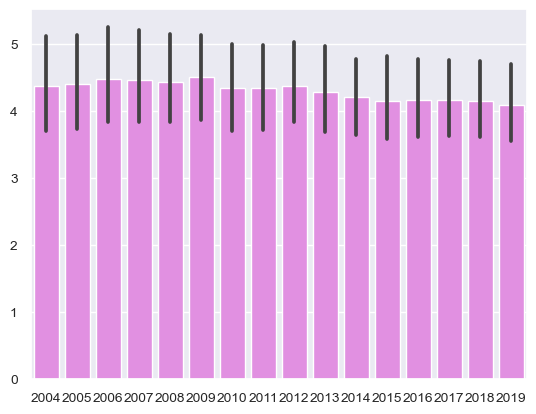

In [8]:
Gcarbon = carbonRaw.drop(carbonRaw.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]], axis=1)
sns.barplot(data=Gcarbon, color = 'violet')

Additionally, we can see Global GDP per year

In [9]:
PGDP = GDP[GDP.Year >= 2005]
PGDP = PGDP[PGDP.Year <= 2019]
PGDP.rename(columns={"GDP per capita, PPP (constant 2017 international $)" : "GDP"}, inplace=True)
PGDP.describe()
#PGDP.to_csv('GDP-Last_15_Years.csv')

<AxesSubplot:xlabel='Year', ylabel='GDP'>

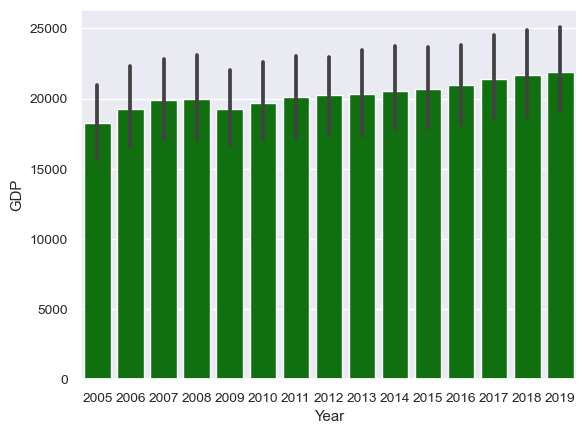

In [10]:
sns.barplot(PGDP, x="Year", y="GDP", color='green')

With this information, we can see that as GDP is increasing on average, carbon emissions are lowering throughout the years. More research is needed to determine if this is a direct correlation 

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Relative Data')]

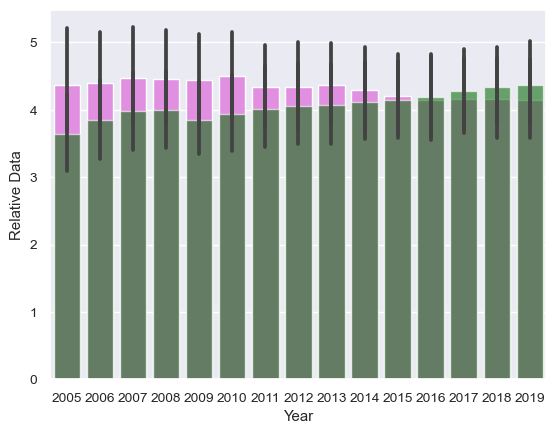

In [11]:
#Code adapted from:
#https://www.geeksforgeeks.org/how-to-overlap-two-barplots-in-seaborn/

ax = plt.subplots()

ax = sns.barplot(data=Gcarbon, color='violet')
ax = sns.barplot(data=PGDP, x=PGDP["Year"], y=PGDP["GDP"]/5000, color='green', alpha=0.6)

ax.set(xlabel="Year", ylabel="Relative Data")

The below code shows us which countries improved their carbon footprint the most from 1990-2019 (30 years).

In [13]:
NameIndex = Pcarbon[['Country Name']]
values = []
i = 0
while i < len(Pcarbon['1990']):
    values.append(Pcarbon['1990'][i] - Pcarbon['2019'][i])
    i+=1
sorted = values.copy()
sorted.sort(reverse=True)

#this gives us the index of the countries
top10 = sorted[0:10]
cIndex = []
for x in top10:
    cIndex.append(values.index(x))
j = 0
print("Most improved countries (ordered):")
while j < len(cIndex):
    print(f" -{NameIndex['Country Name'][cIndex[j]]}")
    j+=1  

Most improved countries (ordered):
 -Estonia
 -Luxembourg
 -United Arab Emirates
 -Ukraine
 -Nauru
 -Moldova
 -Czechia
 -Denmark
 -United States
 -Slovak Republic


Using these countries, we can plot them on a graph to visualize just how much they have improved.

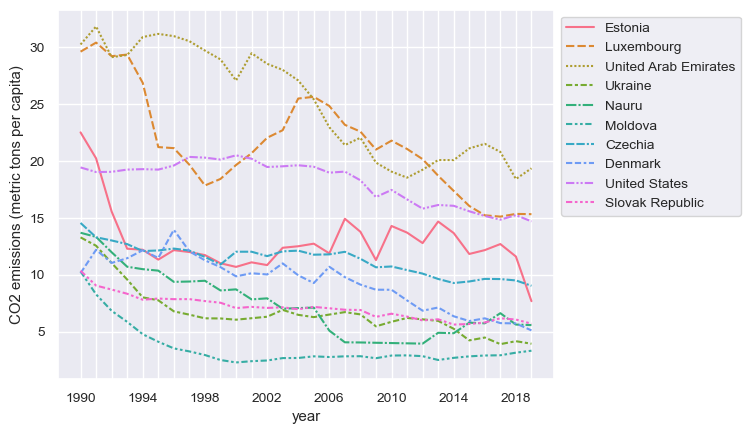

In [35]:
Top = Pcarbon.loc[cIndex]

Top = Top.reset_index(drop=True)
Names = Top['Country Name']

Years = Top.drop(Top.columns[[0]], axis=1)
Years.set_index(Names, inplace=True)
Years = Years.rename_axis('year', axis='columns')
Years = Years.swapaxes("index", "columns")

lineplot = sns.lineplot(Years)

for index, label in enumerate(lineplot.get_xticklabels()):
   if index % 4 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
        
lineplot.set(ylabel='CO2 emissions (metric tons per capita)')
lineplot.legend(bbox_to_anchor=(1,1)) 
        
plt.show()

### Method Chaining

In [39]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)
    
    df1 = (
        pd.read_csv(url_or_path_to_csv_file, skiprows =4)
        .drop(columns = ['Country Code','Indicator Name','Indicator Code', 
            '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
            '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', 
            '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
            '1987', '1988', '1989', 
                         
            #remove below 2 lines for 1990-2019 data
            '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
            '1999', '2000', '2001', '2002', '2003', '2004',
                         
            '2020', '2021', 'Unnamed: 66'],axis=1)
        .dropna().reset_index(drop=True)
        .reset_index(drop=True)
        
    )

    # Method Chain 2 (Create new columns, drop others, and do processing)
    N = df1['Country Name'] 
    df2 = (
        df1    
        .drop(columns=['Country Name'], axis=1)
        .set_index(N)
        .rename_axis('year', axis='columns')
        .swapaxes("index", "columns")
    )

    # Make sure to return the latest dataframe
    return df2 



In [40]:
Carbon = load_and_process('../data/raw/CO2emissions.csv')
Carbon
#Carbon.to_csv('Jayden-Carbon.csv')

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,...,St. Vincent and the Grenadines,"Venezuela, RB",Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2005,1.011151,0.060419,0.508247,0.813539,1.338209,7.353780,3.773437,25.382381,3.753639,1.496011,...,2.301665,5.575724,1.101838,0.334477,4.209995,1.168471,1.049861,7.887329,0.193147,0.870271
2006,0.999696,0.066583,0.474162,0.821840,1.339996,6.790543,3.882118,22.935104,3.942491,1.517763,...,2.301983,5.494561,1.121162,0.326525,4.293064,1.105742,1.059569,7.832423,0.179077,0.808688
2007,1.016758,0.065312,0.441870,0.811754,1.393931,6.531047,3.945362,21.370286,4.102630,1.773161,...,2.488112,5.225781,1.230865,0.501221,4.400356,1.098629,1.093386,8.083508,0.158363,0.796350
2008,1.057285,0.128417,0.456156,0.888658,1.384311,6.439304,4.160964,22.011469,4.172389,1.956930,...,2.306252,5.467902,1.363466,0.445038,4.380013,0.927593,1.106333,8.572610,0.170448,0.613916
2009,0.994719,0.171862,0.430200,0.939404,1.441494,6.156687,4.198570,19.832349,3.867570,1.561584,...,8.218444,5.443614,1.518964,0.564618,4.279135,0.975330,1.180025,8.007606,0.188420,0.618665
2010,1.021548,0.243614,0.472077,0.976184,1.527624,6.157198,4.344378,19.039770,4.099690,1.508351,...,2.309255,5.770054,1.721201,0.550344,4.484850,1.021813,1.098258,8.304084,0.195502,0.756041
2011,0.979352,0.296506,0.476789,0.985522,1.669423,5.850886,4.336634,18.509457,4.280989,1.717343,...,2.492730,5.540041,1.755008,0.535733,4.571988,1.066843,0.963978,7.869816,0.217497,0.884886
2012,0.992616,0.259295,0.480603,0.950696,1.503240,5.944654,4.533165,19.207801,4.264224,1.983192,...,3.319961,6.169104,1.731811,0.480952,4.578805,1.057703,0.858491,8.077958,0.278601,0.915735
2013,1.005027,0.185624,0.508099,1.036294,1.533630,5.942800,4.513583,20.055648,4.342115,1.898127,...,2.117396,6.058551,1.810417,0.428621,4.615620,1.048702,1.106688,8.138264,0.284058,0.919824


In [17]:
import project_functions3 as py
df = py.load_and_process('../data/raw/CO2emissions.csv')
df

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,...,St. Vincent and the Grenadines,"Venezuela, RB",Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2005,1.011151,0.060419,0.508247,0.813539,1.338209,7.353780,3.773437,25.382381,3.753639,1.496011,...,2.301665,5.575724,1.101838,0.334477,4.209995,1.168471,1.049861,7.887329,0.193147,0.870271
2006,0.999696,0.066583,0.474162,0.821840,1.339996,6.790543,3.882118,22.935104,3.942491,1.517763,...,2.301983,5.494561,1.121162,0.326525,4.293064,1.105742,1.059569,7.832423,0.179077,0.808688
2007,1.016758,0.065312,0.441870,0.811754,1.393931,6.531047,3.945362,21.370286,4.102630,1.773161,...,2.488112,5.225781,1.230865,0.501221,4.400356,1.098629,1.093386,8.083508,0.158363,0.796350
2008,1.057285,0.128417,0.456156,0.888658,1.384311,6.439304,4.160964,22.011469,4.172389,1.956930,...,2.306252,5.467902,1.363466,0.445038,4.380013,0.927593,1.106333,8.572610,0.170448,0.613916
2009,0.994719,0.171862,0.430200,0.939404,1.441494,6.156687,4.198570,19.832349,3.867570,1.561584,...,8.218444,5.443614,1.518964,0.564618,4.279135,0.975330,1.180025,8.007606,0.188420,0.618665
2010,1.021548,0.243614,0.472077,0.976184,1.527624,6.157198,4.344378,19.039770,4.099690,1.508351,...,2.309255,5.770054,1.721201,0.550344,4.484850,1.021813,1.098258,8.304084,0.195502,0.756041
2011,0.979352,0.296506,0.476789,0.985522,1.669423,5.850886,4.336634,18.509457,4.280989,1.717343,...,2.492730,5.540041,1.755008,0.535733,4.571988,1.066843,0.963978,7.869816,0.217497,0.884886
2012,0.992616,0.259295,0.480603,0.950696,1.503240,5.944654,4.533165,19.207801,4.264224,1.983192,...,3.319961,6.169104,1.731811,0.480952,4.578805,1.057703,0.858491,8.077958,0.278601,0.915735
2013,1.005027,0.185624,0.508099,1.036294,1.533630,5.942800,4.513583,20.055648,4.342115,1.898127,...,2.117396,6.058551,1.810417,0.428621,4.615620,1.048702,1.106688,8.138264,0.284058,0.919824
